In [567]:
# Import the necessary libs for the homework
import torch
from torch import nn 
import matplotlib.pyplot as plt 
import numpy as np 
import math
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler



In [568]:

# Import Amazon data from yfinance
stock_data = yf.download("AMZN", start="2015-01-01", end="2020-01-01")

# Extract closing volumes
closing_volumes = stock_data['Close']

# Choose the slicing window
N = 60

# Create a tensor containing the slicing windows of closing volumes
input_sequences = []
for i in range(len(closing_volumes) - N):
    input_sequence = closing_volumes.iloc[i:i+N].values

    # Scale the data for better convergence of the algrithm.
    input_array = np.array(input_sequence).reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(-1, 1)) # Scale between -1 and 1 because its the area where ReLu is the most efficient
    scaled_data = scaler.fit_transform(input_array)
    scaled_data_list = []

    # Using a list format for algorithm compatibility after 
    for data in scaled_data: 
        scaled_data_list.append(data[0])

    input_sequences.append(scaled_data_list)

train_data = torch.tensor(input_sequences, dtype=torch.float32)

# Convert your data to a TensorDataset using torch.TensorDataset for loader
train_dataset = torch.utils.data.TensorDataset(train_data)

batch_size = 32

# Create a DataLoader with shuffle=True for shuffling at each epoch
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)


[*********************100%%**********************]  1 of 1 completed


In [569]:
# Designing the architecture of the GAN
class Generator(nn.Module):

     def __init__(self):
         super().__init__()
         self.model = nn.Sequential(
             nn.Linear(N, 2*N), # Input is a N slicing window
             nn.ReLU(),
             nn.Linear(2*N, 4*N),
             nn.ReLU(),
             nn.Dropout(0.3), #droput layers reduce overfitting
             nn.Linear(4*N, 4*N),
             nn.ReLU(),
             nn.Dropout(0.3), #droput layers reduce overfitting
             nn.Linear(4*N, 8*N),
             nn.ReLU(),
             nn.Dropout(0.3), #droput layers reduce overfitting
             nn.Linear(8*N, 4*N),
             nn.ReLU(),
             nn.Dropout(0.3), #droput layers reduce overfitting
             nn.Linear(4*N, 4*N),
             nn.ReLU(),
             nn.Linear(4*N, 2*N),
             nn.ReLU(),
             nn.Linear(2*N, N),  # Output is N slicing window
         )

     def forward(self, x):
         output = self.model(x)
         return output

# Build the discriminator as a NN
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(N, 2*N), #the input is lenght N
            nn.ReLU(),
            nn.Dropout(0.3), #droput layers reduce overfitting
            nn.Linear(2*N, 4*N),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(4*N, 4*N),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(4*N, 2*N),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(2*N, N),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(N, 1),
            nn.Sigmoid(), # sigmoid activation to represent probability
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [570]:
# Sets the parameters
lr_d = 0.0002
lr_g = 0.0001
loss_function = nn.BCELoss()


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 0 Loss D.: 0.6943421363830566
Epoch: 0 Loss G.: 0.6925699710845947


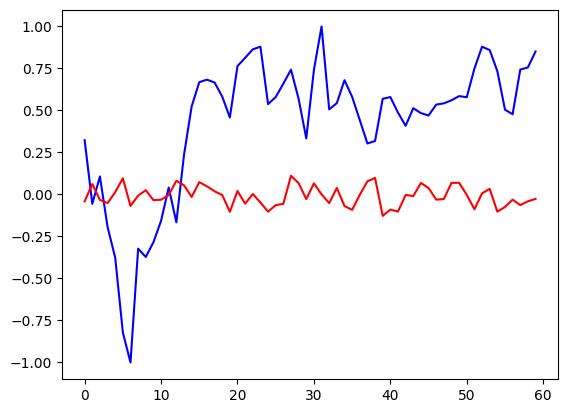

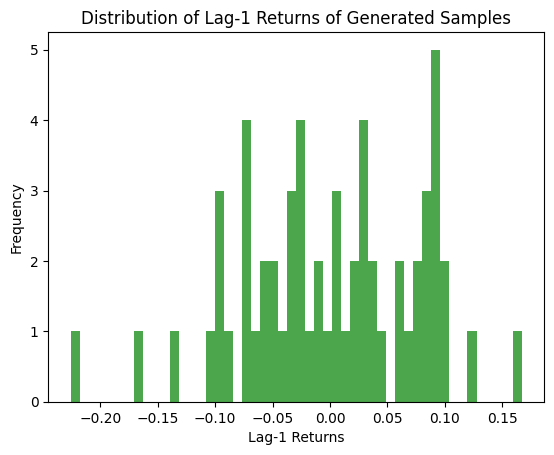

  5%|▌         | 50/1000 [00:32<09:36,  1.65it/s]

Epoch: 50 Loss D.: 0.23938687145709991
Epoch: 50 Loss G.: 1.6579805612564087


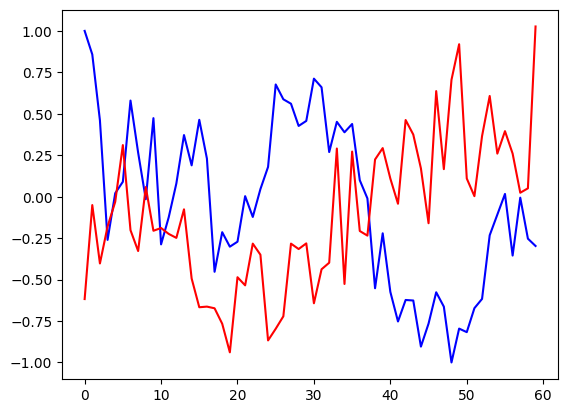

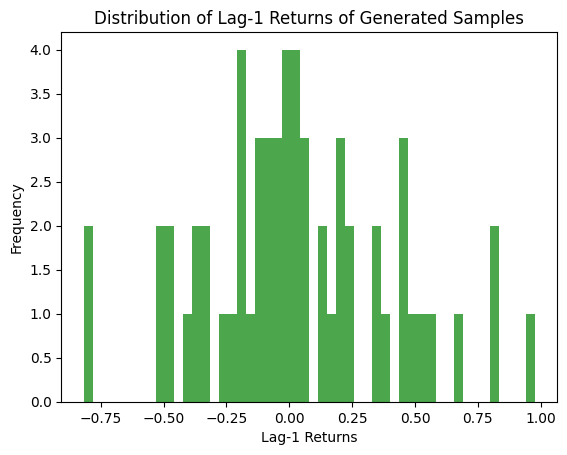

 10%|█         | 100/1000 [01:03<09:42,  1.54it/s]

Epoch: 100 Loss D.: 0.4582119584083557
Epoch: 100 Loss G.: 0.7818561792373657


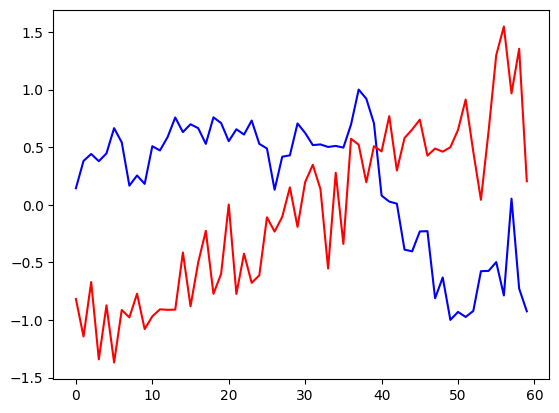

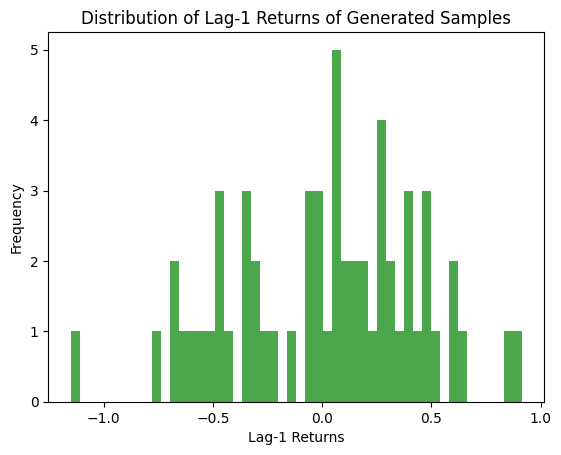

 15%|█▌        | 150/1000 [01:34<09:02,  1.57it/s]

Epoch: 150 Loss D.: 0.4627751410007477
Epoch: 150 Loss G.: 2.9904372692108154


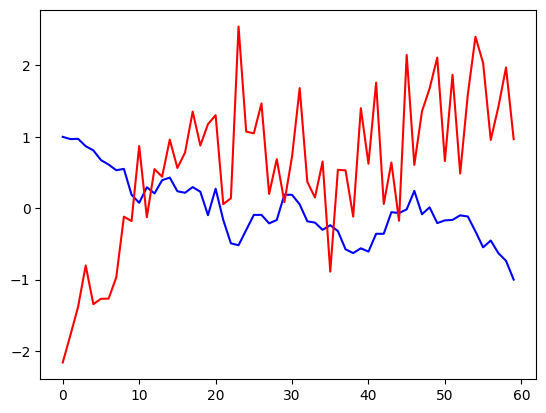

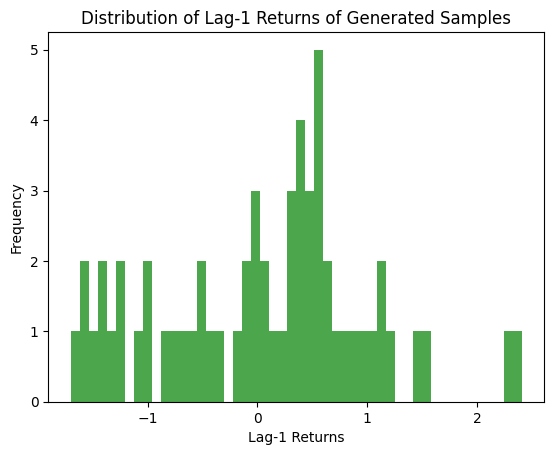

 20%|██        | 200/1000 [02:05<08:34,  1.56it/s]

Epoch: 200 Loss D.: 0.6808261871337891
Epoch: 200 Loss G.: 0.7687587141990662


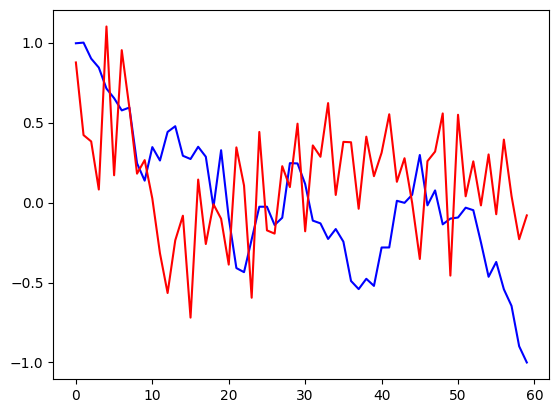

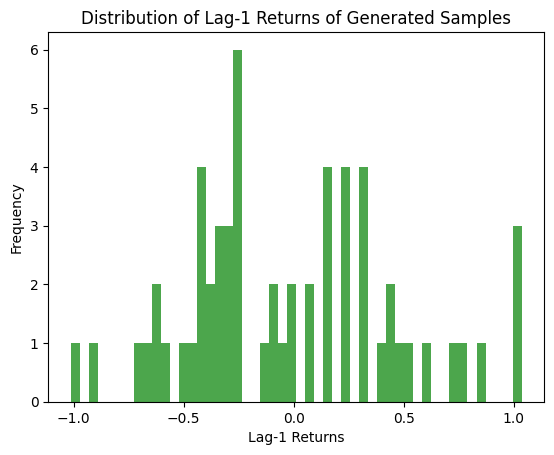

 25%|██▌       | 250/1000 [02:37<07:30,  1.66it/s]

Epoch: 250 Loss D.: 0.8627452254295349
Epoch: 250 Loss G.: 0.5200013518333435


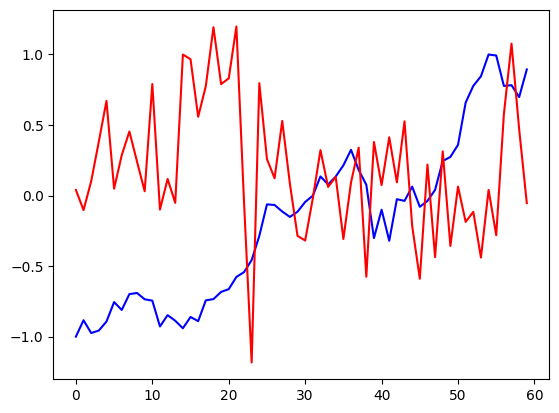

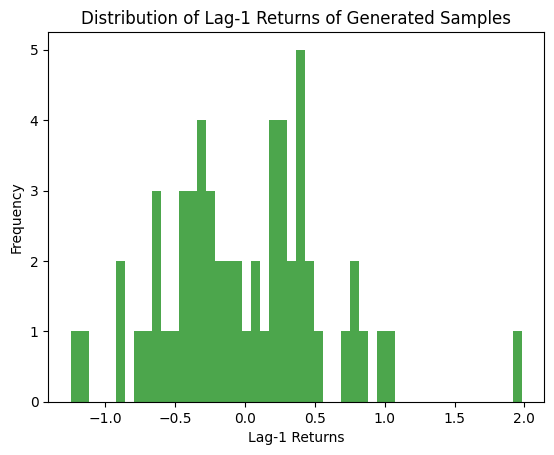

 30%|███       | 300/1000 [03:10<08:09,  1.43it/s]

Epoch: 300 Loss D.: 0.616698145866394
Epoch: 300 Loss G.: 0.8008162379264832


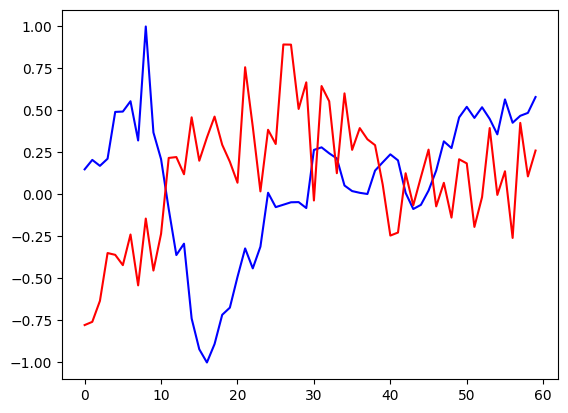

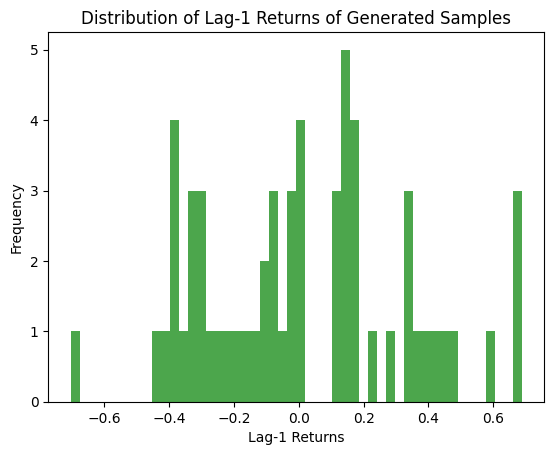

 35%|███▌      | 350/1000 [03:44<07:26,  1.46it/s]

Epoch: 350 Loss D.: 1.322951316833496
Epoch: 350 Loss G.: 0.4548071026802063


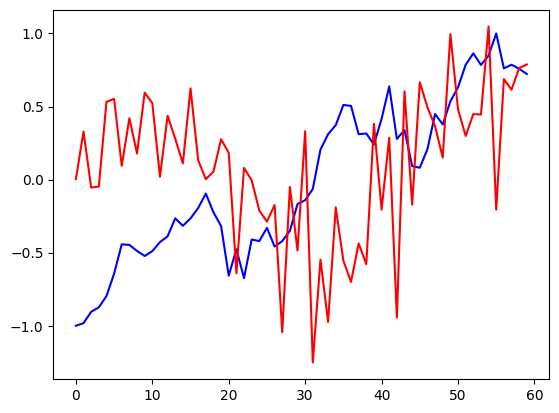

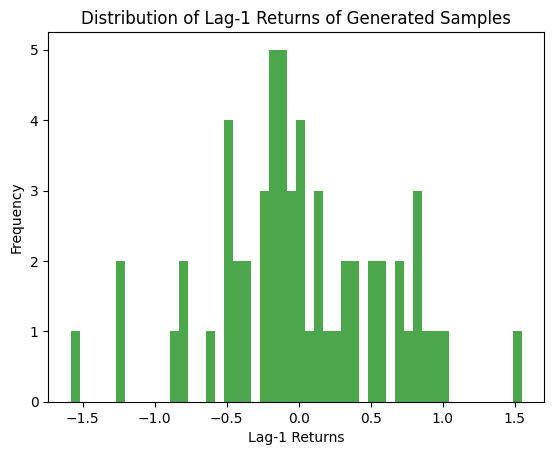

 40%|████      | 400/1000 [04:19<06:57,  1.44it/s]

Epoch: 400 Loss D.: 0.6524967551231384
Epoch: 400 Loss G.: 0.7065158486366272


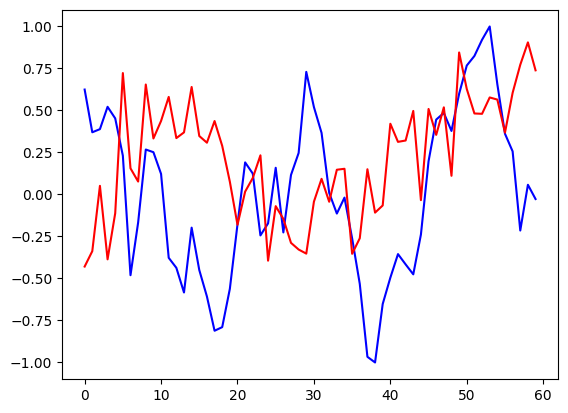

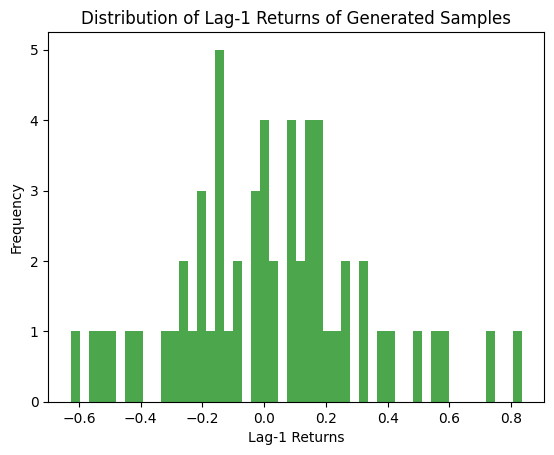

 45%|████▌     | 450/1000 [04:54<06:26,  1.42it/s]

Epoch: 450 Loss D.: 0.6419079303741455
Epoch: 450 Loss G.: 1.0216211080551147


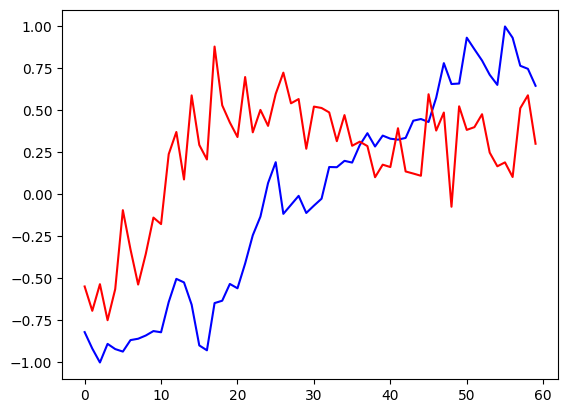

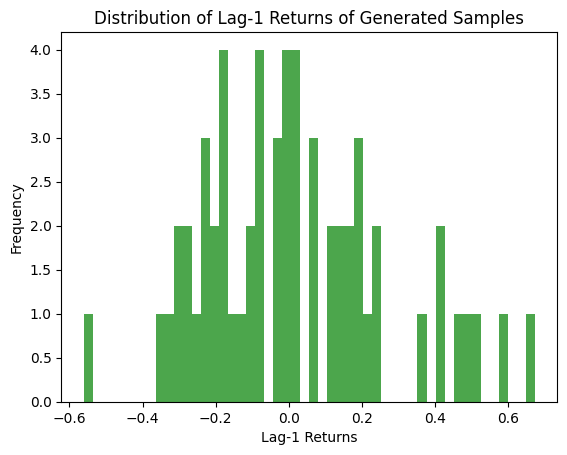

 50%|█████     | 500/1000 [05:29<05:25,  1.54it/s]

Epoch: 500 Loss D.: 0.5456314086914062
Epoch: 500 Loss G.: 1.1181591749191284


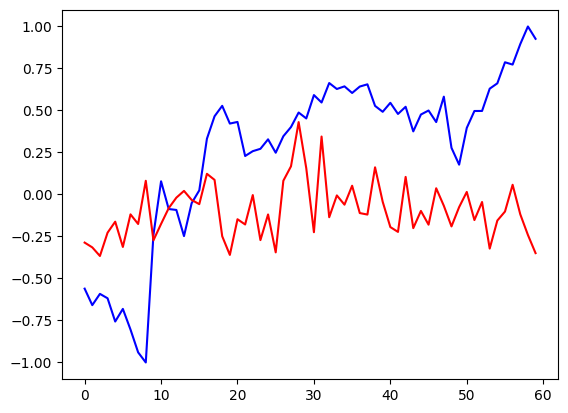

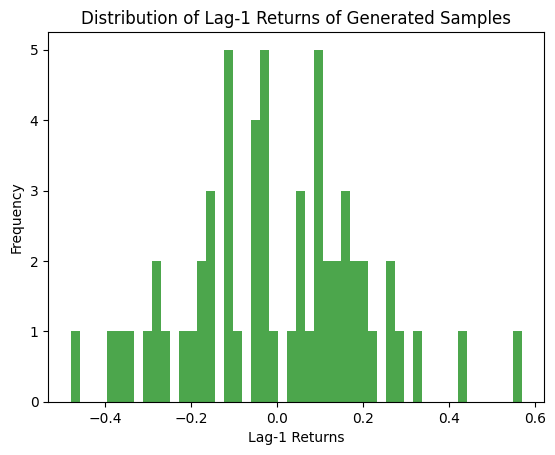

 55%|█████▌    | 550/1000 [06:04<04:58,  1.51it/s]

Epoch: 550 Loss D.: 0.5023059844970703
Epoch: 550 Loss G.: 1.0802496671676636


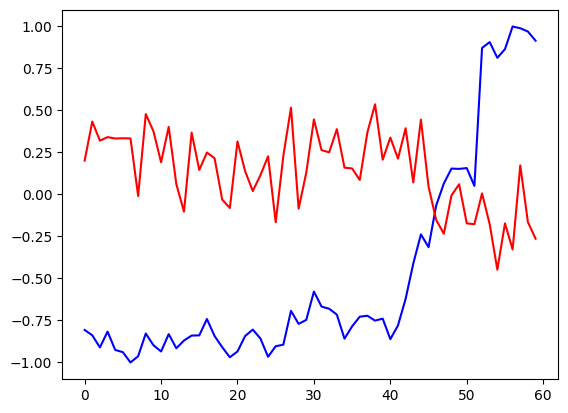

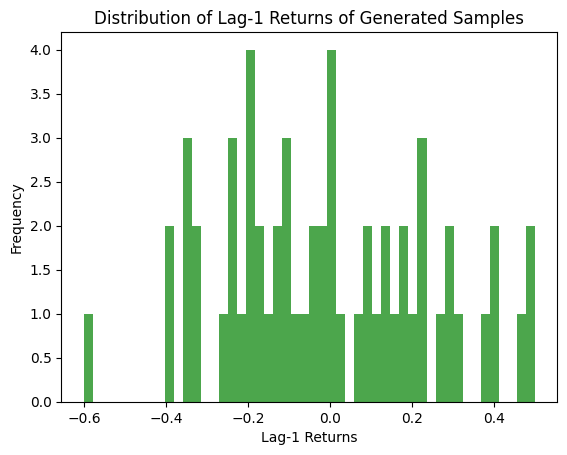

 60%|██████    | 600/1000 [06:47<08:20,  1.25s/it]

Epoch: 600 Loss D.: 0.6335516571998596
Epoch: 600 Loss G.: 0.9352262616157532


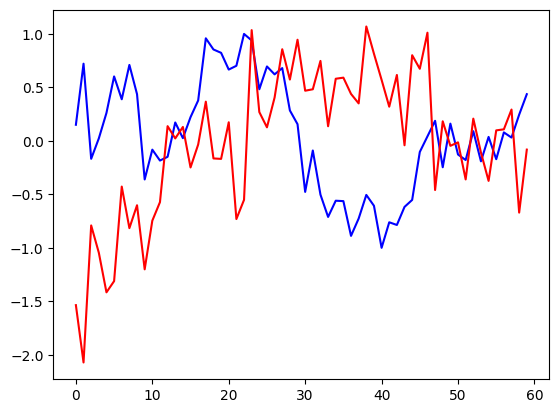

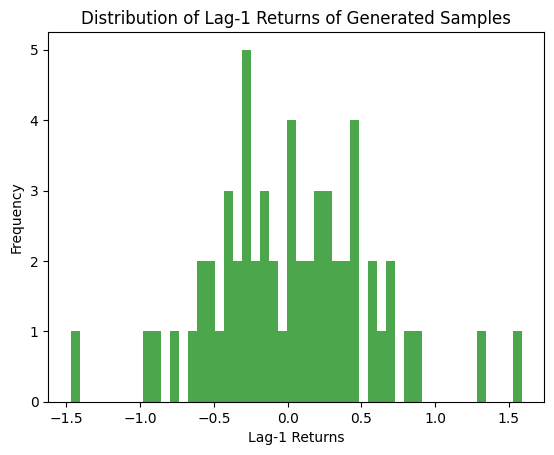

 65%|██████▌   | 650/1000 [07:35<05:49,  1.00it/s]

Epoch: 650 Loss D.: 0.7023220062255859
Epoch: 650 Loss G.: 0.8271201252937317


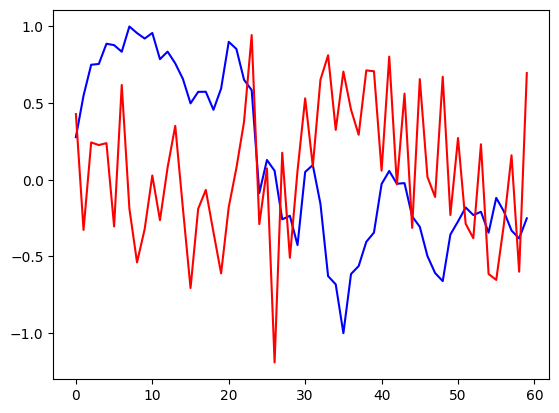

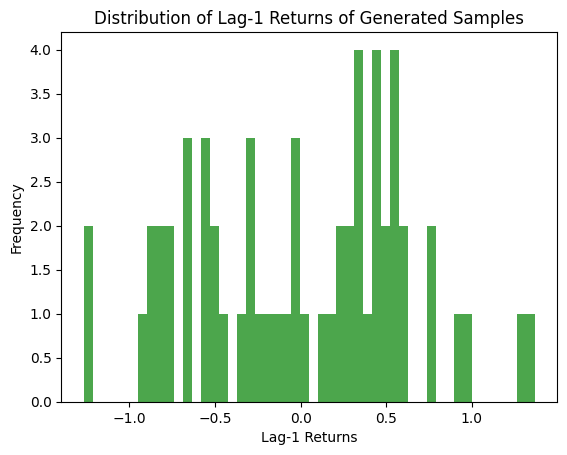

 70%|███████   | 700/1000 [08:19<03:22,  1.48it/s]

Epoch: 700 Loss D.: 0.6458301544189453
Epoch: 700 Loss G.: 0.8773759007453918


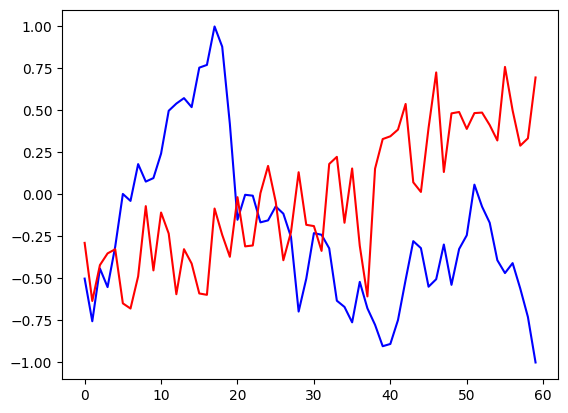

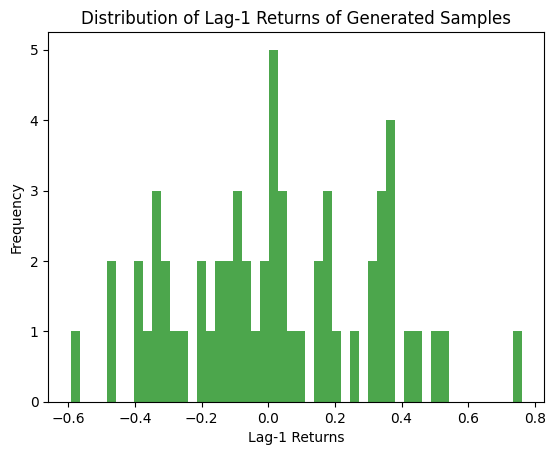

 75%|███████▌  | 750/1000 [09:00<04:55,  1.18s/it]

Epoch: 750 Loss D.: 0.6921776533126831
Epoch: 750 Loss G.: 0.7292724251747131


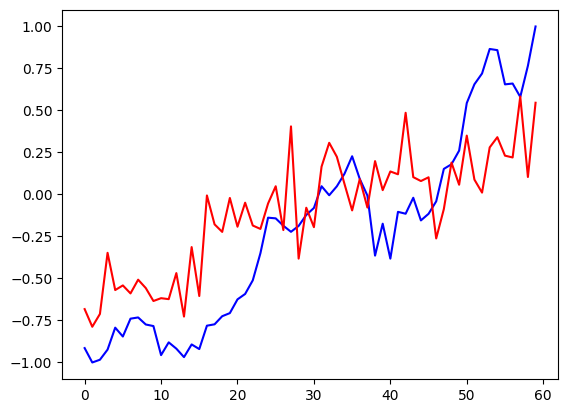

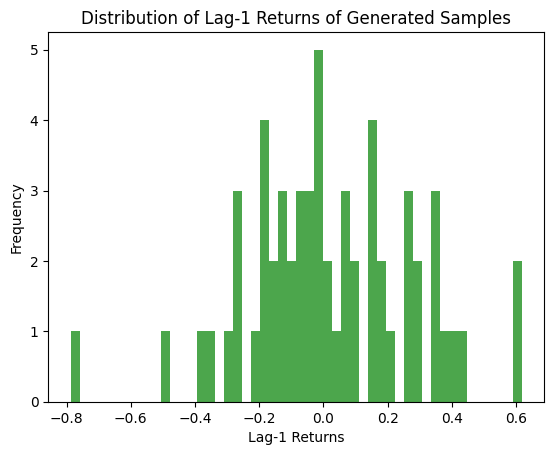

 80%|████████  | 800/1000 [09:43<02:18,  1.44it/s]

Epoch: 800 Loss D.: 1.0496997833251953
Epoch: 800 Loss G.: 0.4352114796638489


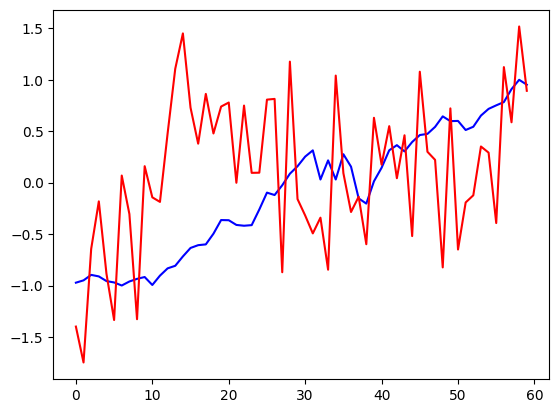

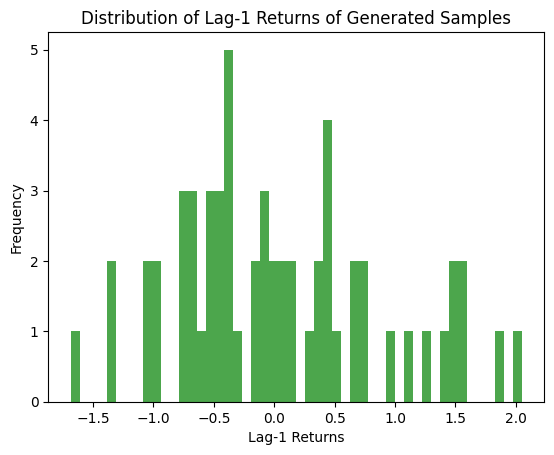

 85%|████████▌ | 850/1000 [10:27<03:38,  1.45s/it]

Epoch: 850 Loss D.: 0.7050512433052063
Epoch: 850 Loss G.: 0.8747360110282898


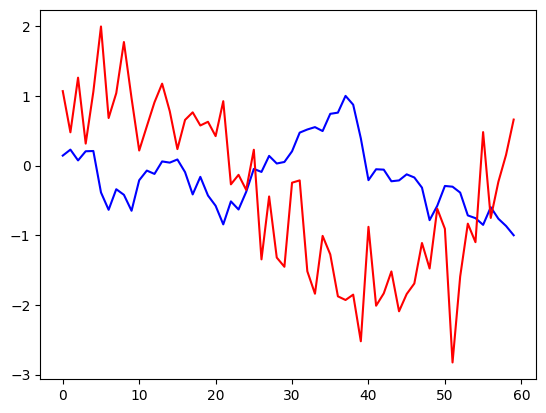

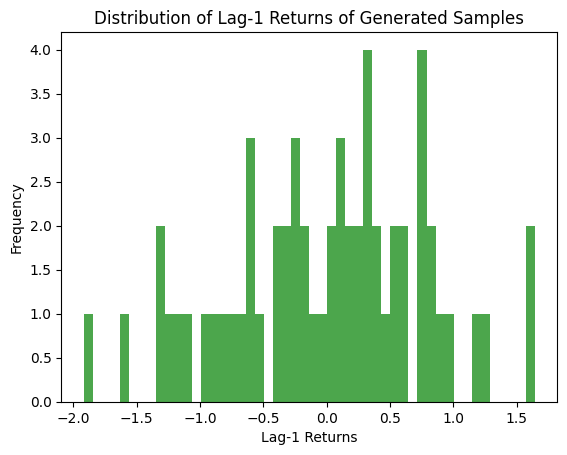

 90%|█████████ | 900/1000 [11:13<01:18,  1.27it/s]

Epoch: 900 Loss D.: 0.6632595658302307
Epoch: 900 Loss G.: 0.9191638231277466


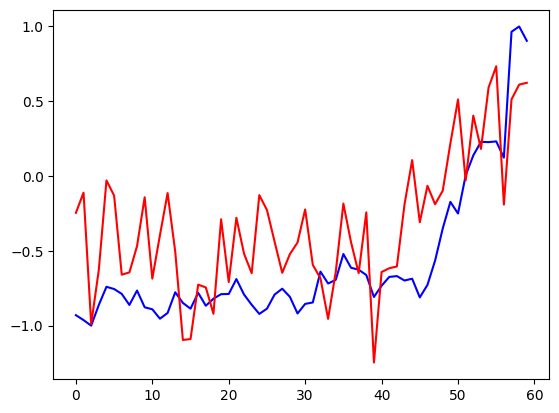

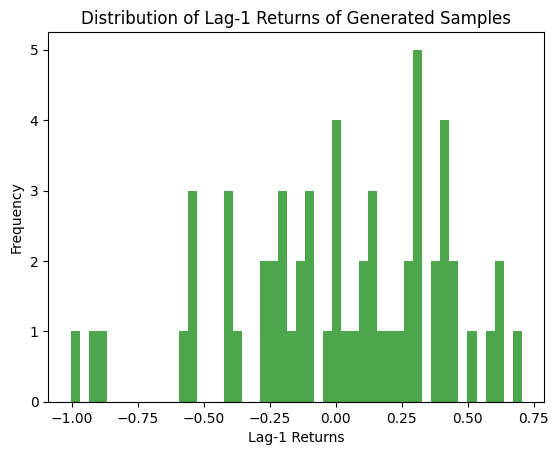

 95%|█████████▌| 950/1000 [12:05<00:38,  1.30it/s]

Epoch: 950 Loss D.: 0.7157592177391052
Epoch: 950 Loss G.: 0.8436037302017212


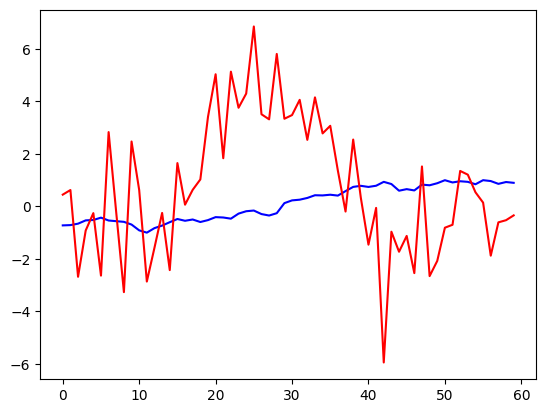

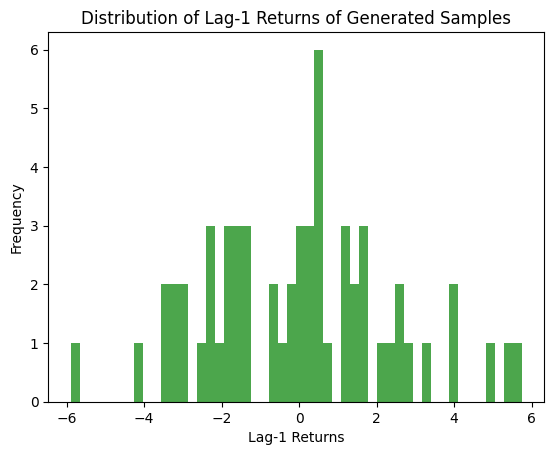

100%|██████████| 1000/1000 [12:47<00:00,  1.30it/s]


In [571]:
from tqdm import tqdm
# Training loop :
num_epochs = 1000
discriminator = Discriminator()
generator = Generator()
gen_loss_vector = []
discr_loss_vector = []
num_epoch_vector = []


optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr_d)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr_g)


for epoch in tqdm(range(num_epochs)):

    for index, batch in enumerate(train_loader):
        real_data_set = batch[0]

        # Preparing the real data to train the discriminator:
        real_data_label = torch.ones(batch_size,1)

        # Preparing the fake data to train the discriminator: 
        noise_data_set = torch.randn((batch_size, N))
        fake_data_set = generator(noise_data_set)
        fake_data_label = torch.zeros(batch_size, 1)

        # Creating the training samples set:
        training_data_set = torch.cat((real_data_set, fake_data_set))

        # Creating the training labels set:
        training_labels_set = torch.cat((real_data_label, fake_data_label))

        # Train the discriminator:
        discriminator.zero_grad()
        output_discriminator = discriminator(training_data_set)
        loss_discriminator = loss_function(
            output_discriminator, training_labels_set)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Initialising the data for the gznzrator: 
        noise_data_set = torch.randn((batch_size, N))

        # Train the generatot:  
        generator.zero_grad()
        output_generator = generator(noise_data_set)
        output_discriminator_generated = discriminator(output_generator)
        loss_generator = loss_function(output_discriminator_generated, real_data_label)
        # We put label = 1 so that the error we want to minimize is the distance between our generated data and the label 1
        loss_generator.backward()
        optimizer_generator.step()

        # prepares data for loss plot afterwise:
        if index == 0:
            gen_loss_vector.append(float(loss_generator))
            discr_loss_vector.append(float(loss_discriminator))
            num_epoch_vector.append(epoch)

    
        # Show loss
        if epoch % 50 == 0 and index == 0:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

            # Let's plot the first time series of the batch in blue
            time_steps = []
            for time in range(len(real_data_set[0])):
                time_steps.append(time)
            plt.plot(time_steps,real_data_set[0],"-",color='blue')

            generated_samples_for_plotting = output_generator.detach()[0]

            # Plot generated samples in red
            plt.plot(time_steps, generated_samples_for_plotting, "-", color='red')
            plt.show()

            # let's plot the lag 1 return distribution
            # Calculate lag-1 returns
            lag_1_returns = generated_samples_for_plotting[1:] - generated_samples_for_plotting[:-1]

            # Plot the distribution of lag-1 returns
            plt.hist(lag_1_returns, bins=50, color='green', alpha=0.7)
            plt.xlabel('Lag-1 Returns')
            plt.ylabel('Frequency')
            plt.title('Distribution of Lag-1 Returns of Generated Samples')
            plt.show()




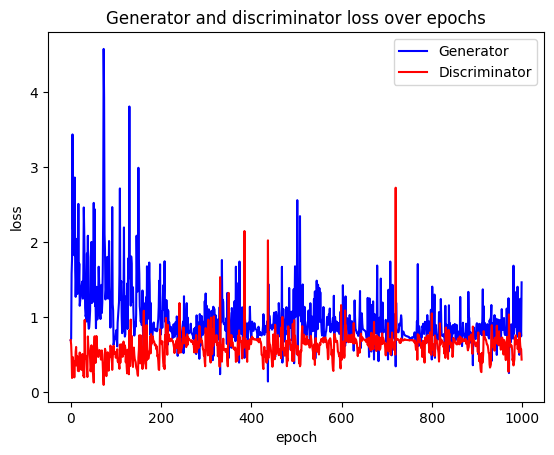

In [572]:
# Plot the functions on the same graph
plt.plot(num_epoch_vector, gen_loss_vector, label='Generator', color = 'b')  
plt.plot(num_epoch_vector, discr_loss_vector, label='Discriminator', color = 'r')  
plt.legend()  
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Generator and discriminator loss over epochs')
plt.show()